___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ri = pd.read_csv("police.csv",low_memory = False)

In [3]:
drop_columns = ["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis = "columns", inplace=True)  

In [4]:
ri["is_arrested"] = ri.is_arrested.astype("bool")

In [5]:
combined = ri.stop_date.str.cat(ri.stop_time, sep = " ")

In [6]:
ri["stop_datetime"] = pd.to_datetime(combined)

In [7]:
ri.drop(["stop_date", "stop_time"], axis = "columns", inplace=True)

In [7]:
ri.set_index("stop_datetime", inplace = True)

In [9]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 11:30:00,RI-2005-00003,Zone X1,000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN,True,NaN,NaN,False,Zone X1
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [10]:
ri["is_arrested"].mean()

0.08961683876777828

In [8]:
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

In [9]:
ri.groupby(ri.index.hour)["is_arrested"].mean()

stop_datetime
0.0     0.119693
1.0     0.148556
2.0     0.141099
3.0     0.133672
4.0     0.171027
5.0     0.132911
6.0     0.042369
7.0     0.055755
8.0     0.068730
9.0     0.071658
10.0    0.069411
11.0    0.073083
12.0    0.083757
13.0    0.079301
14.0    0.080323
15.0    0.080375
16.0    0.089049
17.0    0.102170
18.0    0.097704
19.0    0.083351
20.0    0.089661
21.0    0.148670
22.0    0.112783
23.0    0.106722
Name: is_arrested, dtype: float64

***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [10]:
import matplotlib.pyplot as pl


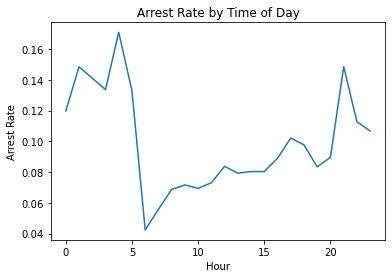

In [11]:
plt.plot(hourly_arrest_rate)
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title('Arrest Rate by Time of Day')
plt.show()

<AxesSubplot:xlabel='stop_datetime'>

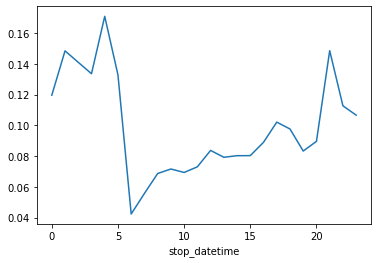

In [12]:
hourly_arrest_rate.plot()

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [13]:
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

<AxesSubplot:xlabel='stop_datetime'>

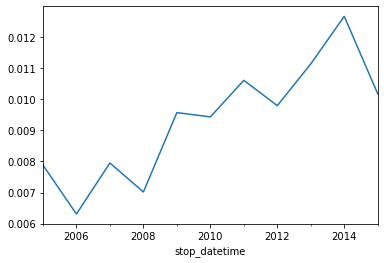

In [14]:
annual_drug_rate.plot()

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [15]:
ri.search_conducted = ri.search_conducted.astype("bool")

In [16]:
annual_search_rate = ri.search_conducted.resample("A").mean()

In [17]:
type(annual_search_rate)

pandas.core.series.Series

In [18]:
annual = pd.concat([annual_drug_rate,annual_search_rate],axis= "columns")
annual


,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.007884,0.049719
2006-12-31,0.006308,0.035943
2007-12-31,0.007951,0.039434
2008-12-31,0.007018,0.036761
2009-12-31,0.009574,0.045682
2010-12-31,0.009436,0.039159
2011-12-31,0.010613,0.035157
2012-12-31,0.009798,0.030578
2013-12-31,0.011144,0.027257


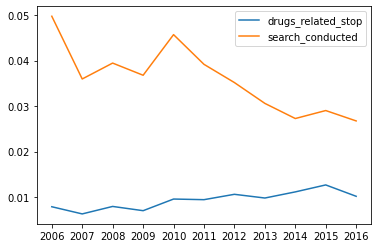

In [21]:
plt.plot(annual.index,annual.drugs_related_stop, label="drugs_related_stop")
plt.plot(annual.index,annual.search_conducted, label="search_conducted")
plt.legend()
plt.show()

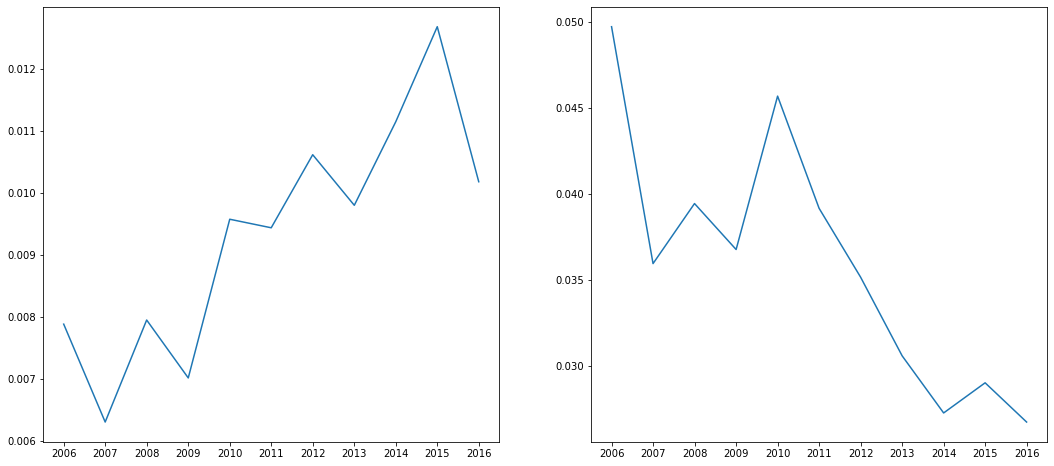

In [22]:
fig,ax = plt.subplots(1,2,figsize=(18,8))
ax[0].plot(annual.index,annual.drugs_related_stop)
ax[1].plot(annual.index,annual.search_conducted)

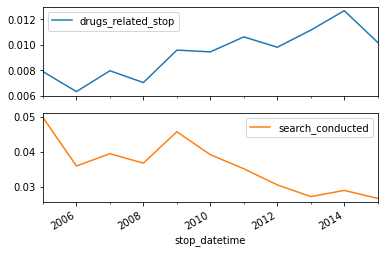

In [23]:
annual.plot(subplots=True);

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [24]:
all_zones = pd.crosstab(ri.district,ri.violation)
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3788,7130,1502,628,1,33068
Zone K2,11285,16440,5103,4056,2898,57500
Zone K3,12959,16218,3929,3871,3660,68238
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17179,4070,3532,4446,48690
Zone X4,19975,29556,8865,7551,4871,54855


In [25]:
all_zones.iloc[0:3]

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3788,7130,1502,628,1,33068
Zone K2,11285,16440,5103,4056,2898,57500
Zone K3,12959,16218,3929,3871,3660,68238


In [26]:
all_zones.loc["Zone K1":"Zone K3"]

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3788,7130,1502,628,1,33068
Zone K2,11285,16440,5103,4056,2898,57500
Zone K3,12959,16218,3929,3871,3660,68238


In [27]:
k_zones = all_zones.loc["Zone K1":"Zone K3"]

In [24]:
#dersde
ri.district.value_counts()

Zone X4    135349
Zone K3    113784
Zone K2    101403
Zone X3     94058
Zone K1     48362
Zone X1     16715
Zone NA        10
Name: district, dtype: int64

In [25]:
ri.violation.unique()

array(['Speeding', nan, 'Equipment', 'Other', 'Moving violation',
       'Registration/plates', 'Seat belt'], dtype=object)

In [26]:
ri.violation.value_counts()

Speeding               268744
Moving violation        90234
Equipment               61252
Other                   24221
Registration/plates     19830
Seat belt               16327
Name: violation, dtype: int64

In [27]:
pd.crosstab(ri.district, ri.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3788,7130,1502,628,1,33068
Zone K2,11285,16440,5103,4056,2898,57500
Zone K3,12959,16218,3929,3871,3660,68238
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17179,4070,3532,4446,48690
Zone X4,19975,29556,8865,7551,4871,54855


In [28]:
all_zones = pd.crosstab(ri.district, ri.violation)

In [29]:
all_zones.loc["Zone K1":"Zone K3"]

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3788,7130,1502,628,1,33068
Zone K2,11285,16440,5103,4056,2898,57500
Zone K3,12959,16218,3929,3871,3660,68238


In [30]:
k_zones = all_zones.loc["Zone K1":"Zone K3"]

***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

<AxesSubplot:xlabel='district'>

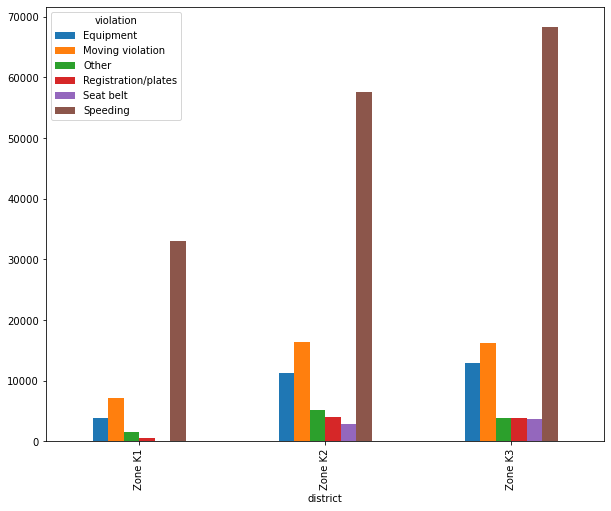

In [32]:
k_zones.plot(kind="bar",figsize=(10,8))

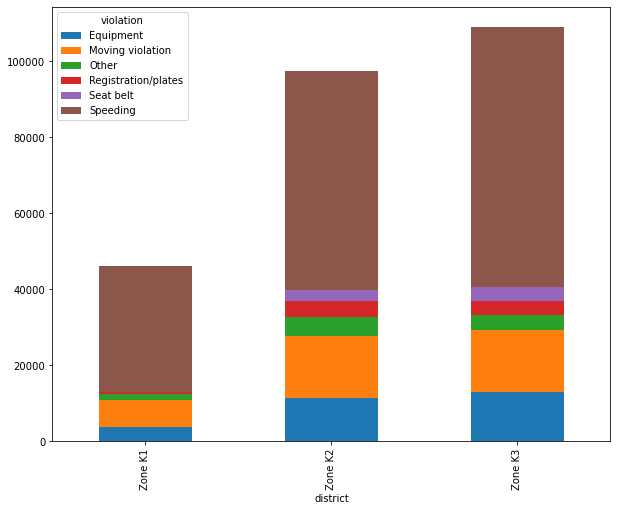

In [35]:
k_zones.plot(kind="bar", stacked= True,figsize=(10,8));

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

<AxesSubplot:xlabel='district'>

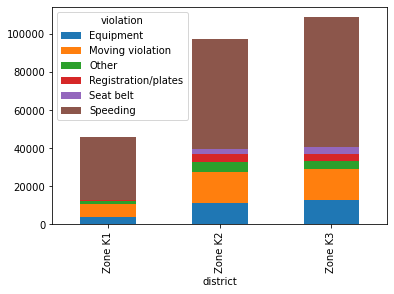

In [29]:
k_zones.plot(kind="bar",stacked=True)

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [37]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', nan, '30+ Min', '2', '1'], dtype=object)

In [38]:
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

In [39]:
ri['stop_minutes'] = ri.stop_duration.map(mapping)

In [41]:
ri.stop_minutes.unique()

array([ 8., 23., nan, 45.])

In [63]:
ri.stop_minutes.value_counts()

8.0     386665
23.0     76323
45.0     17614
Name: stop_duration, dtype: int64

In [ ]:
#dersde tekrar yaptik

In [42]:
mapping = {"0-15 Min": 8, "16-30 Min": 23, "30+ Min": 45}

In [ ]:
ri["staop_minutes"] = ri.stop_duration.map(mapping)

***

## Plotting stop length

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [58]:
ri.violation_raw.value_counts()

Speeding                            268744
Other Traffic Violation              90234
Equipment/Inspection Violation       61252
Registration Violation               19830
Seatbelt Violation                   16327
Special Detail/Directed Patrol       13642
Call for Service                      7609
Violation of City/Town Ordinance      1036
Motorist Assist/Courtesy               990
APB                                    485
Suspicious Person                      342
Warrant                                117
Name: violation_raw, dtype: int64

In [69]:
print(ri.stop_minutes.unique())

[ 8. 23. nan 45.]


In [72]:
ri.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 18.593814
Call for Service                    21.967670
Equipment/Inspection Violation      11.454213
Motorist Assist/Courtesy            17.620202
Other Traffic Violation             13.834137
Registration Violation              13.543268
Seatbelt Violation                   9.697924
Special Detail/Directed Patrol      14.876778
Speeding                            10.589193
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64

In [79]:
stop_length = ri.groupby('violation_raw')["stop_minutes"].mean()

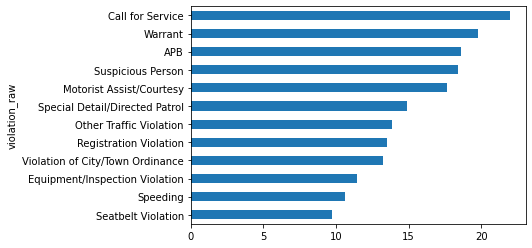

In [80]:
stop_length.sort_values().plot(kind="barh");